# **Face Recognition Pipeline**

## Feature Extraction

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


### Load Data

In [ ]:
from tensorflow import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from imutils import paths
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers import Input, BatchNormalization
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import random
import os
import matplotlib.pyplot as plt

image_path = list(paths.list_images('face_data/'))

random.shuffle(image_path)

image_path

['face_data/Kiên/frame22.png',
 'face_data/Hùng/frame64.png',
 'face_data/Tân/frame14.png',
 'face_data/Tuấn/frame5.png',
 'face_data/Tuấn/frame55.png',
 'face_data/Quân/frame14.png',
 'face_data/Xuân Anh/frame36.png',
 'face_data/Linh/frame9.png',
 'face_data/Đức/frame17.png',
 'face_data/HĐức/frame2.png',
 'face_data/Tân/frame0.png',
 'face_data/Trường/frame37.png',
 'face_data/Đức/frame42.png',
 'face_data/Thắng/frame53.png',
 'face_data/Tân/frame52.png',
 'face_data/Trường/frame9.png',
 'face_data/Kiên/frame44.png',
 'face_data/Linh/frame0.png',
 'face_data/Việt Đức/frame52.png',
 'face_data/Hùng/frame9.png',
 'face_data/Hiếu/frame0.png',
 'face_data/Tuấn/frame17.png',
 'face_data/HĐức/frame45.png',
 'face_data/Hiếu/frame6.png',
 'face_data/Quân/frame9.png',
 'face_data/Thắng/frame74.png',
 'face_data/Hiếu/frame1.png',
 'face_data/Việt Đức/frame6.png',
 'face_data/Hiếu/frame60.png',
 'face_data/Hùng/frame3.png',
 'face_data/Xuân A

In [ ]:
# face_datat/name_of_person/frame%d.png: 'face_data/Tuấn/frame3.png'
# p.split(os.path.sep)[-2] can extract the name of the person
names = [p.split(os.path.sep)[-2] for p in image_path]
names

['Kiên',
 'Hùng',
 'Tân',
 'Tuấn',
 'Tuấn',
 'Quân',
 'Xuân Anh',
 'Linh',
 'Đức',
 'HĐức',
 'Tân',
 'Trường',
 'Đức',
 'Thắng',
 'Tân',
 'Trường',
 'Kiên',
 'Linh',
 'Việt Đức',
 'Hùng',
 'Hiếu',
 'Tuấn',
 'HĐức',
 'Hiếu',
 'Quân',
 'Thắng',
 'Hiếu',
 'Việt Đức',
 'Hiếu',
 'Hùng',
 'Xuân Anh',
 'Hiếu',
 'Thắng',
 'Vân',
 'Đức',
 'Tuấn',
 'HĐức',
 'Xuân Anh',
 'Hùng',
 'Thắng',
 'Đức',
 'Việt Đức',
 'Trường',
 'Đức',
 'Kiên',
 'Thắng',
 'Trường',
 'Tân',
 'Xuân Anh',
 'Việt Đức',
 'Tuấn',
 'Tân',
 'HĐức',
 'Đức',
 'Xuân Anh',
 'Tuấn',
 'Hiếu',
 'Kiên',
 'Thắng',
 'Trường',
 'Kiên',
 'Hiếu',
 'Quân',
 'Thắng',
 'Hùng',
 'Việt Đức',
 'HĐức',
 'Linh',
 'Việt Đức',
 'Xuân Anh',
 'Đức',
 'HĐức',
 'Linh',
 'Đức',
 'Hùng',
 'Việt Đức',
 'Việt Đức',
 'Hùng',
 'Hùng',
 'Hiếu',
 'Xuân Anh',
 'Hùng',
 'Đức',
 'Thắng',
 'Tân',
 'Vân',
 'Hùng',
 '

In [ ]:
# Transform the name of each person to a number
le = LabelEncoder()
labels = le.fit_transform(names)
labels

# One-hot encoding
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)

array([ 3,  1,  6,  9,  9,  5, 12,  4, 13,  2,  6,  8, 13,  7,  6,  8,  3,
        4, 11,  1,  0,  9,  2,  0,  5,  7,  0, 11,  0,  1, 12,  0,  7, 10,
       13,  9,  2, 12,  1,  7, 13, 11,  8, 13,  3,  7,  8,  6, 12, 11,  9,
        6,  2, 13, 12,  9,  0,  3,  7,  8,  3,  0,  5,  7,  1, 11,  2,  4,
       11, 12, 13,  2,  4, 13,  1, 11, 11,  1,  1,  0, 12,  1, 13,  7,  6,
       10,  1,  5,  1, 11, 13, 11,  9,  5, 13, 11, 12,  9, 10, 13, 10,  1,
       10,  0, 12,  1,  2, 13, 10,  5,  1, 12,  1,  3,  1, 10,  8,  1,  5,
        8, 10, 12,  2,  4,  0,  9,  3, 12,  8,  1, 10,  8,  4, 13,  6,  9,
        9,  8,  9,  9,  8,  0, 11, 13,  4,  7,  1, 10,  1, 13,  4,  6, 13,
        6,  5,  5,  4,  6,  1,  7, 10, 12,  6,  6,  5,  6,  4,  6, 12,  4,
       12,  2, 10, 10, 11,  4, 13, 12,  5, 12,  4,  6,  7,  2,  9,  1,  5,
        9,  3,  9,  8,  5,  8,  4,  7, 11,  3,  5,  9, 11,  9, 11,  3,  9,
        1,  4, 10,  6,  8,  6,  3,  1,  1, 10,  6,  9, 12,  0, 10,  6, 11,
        1,  2,  8, 11,  6

In [ ]:
keys = labels
values = names
dict = {}
count = 0
for i in keys:
  dict[i] = values[count]
  count += 1
dict

{0: 'Hiếu',
 1: 'Hùng',
 2: 'HĐức',
 3: 'Kiên',
 4: 'Linh',
 5: 'Quân',
 6: 'Tân',
 7: 'Thắng',
 8: 'Trường',
 9: 'Tuấn',
 10: 'Vân',
 11: 'Việt Đức',
 12: 'Xuân Anh',
 13: 'Đức'}

### Detect, Crop & Align Data

In [ ]:
import argparse
import imutils
import time
import dlib
import cv2

def convert_and_trim_bb(image, rect):
  # extract the starting and ending (x, y)-coordinates of the
  # bounding box
  startX = rect.left()
  startY = rect.top()
  endX = rect.right()
  endY = rect.bottom()

  # ensure the bounding box coordinates fall within the spatial
  # dimensions of the image
  startX = max(0, startX)
  startY = max(0, startY)
  endX = min(endX, image.shape[1])
  endY = min(endY, image.shape[0])

  # compute the width and height of the bounding box
  w = endX - startX
  h = endY - startY
  
  # return our bounding box coordinates
  return (startX, startY, w, h)

# load dlib's CNN face detector
detector = dlib.cnn_face_detection_model_v1('./Save_model/mmod_human_face_detector.dat')

new_image_list = []
resized_image_list = []

for image in image_path:
  # load the input image from disk, resize it, and convert it from
  image = cv2.imread(image)
  resized_image = cv2.resize(image, (int(image.shape[1]/2),int(image.shape[0]/2)), interpolation = cv2.INTER_AREA)
  resized_image_list.append(resized_image)

In [ ]:
for image in resized_image_list:
  # BGR to RGB channel ordering (which is what dlib expects)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # perform face detection using dlib's face detector
  results = detector(rgb, 1)

  boxes = [convert_and_trim_bb(image, r.rect) for r in results]

  crop_image = image

  # loop over the bounding boxes
  for (x, y, w, h) in boxes:
    # draw the bounding box on our image
    # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop_image = image[y:y+h, x:x+w]
  
  new_image_list.append(crop_image)

In [ ]:
image_list = []
for image in new_image_list:
    resized_image = cv2.resize(image, (160,160), interpolation = cv2.INTER_AREA)
    resized_image = img_to_array(resized_image)
    
    resized_image = np.expand_dims(resized_image, 0) # convert to <numpy.ndarray>
    
    image_list.append(resized_image)
    
image_list = np.vstack(image_list) # convert to <numpy.ndarray> 
image_list.shape

(345, 160, 160, 3)

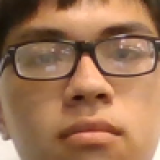

In [ ]:
cv2_imshow(image_list[0])

### Transfer Learning

In [ ]:
norm_image_list = []
for image in image_list:
  image = image.astype('float32')
  mean, std = image.mean(), image.std()
  image = (image - mean) / std

  norm_image_list.append(image)

norm_image_list = np.asarray(norm_image_list)
norm_image_list.shape

(345, 160, 160, 3)

In [ ]:
from keras.models import load_model
facenet = load_model('./Save_model/facenet_keras.h5')

features = facenet.predict(norm_image_list)
features.shape

Cause: could not parse the source code of <function <lambda> at 0x7fb954d86cb0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb954d86cb0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb954d868c0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb954d868c0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb954d27dd0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could no

(345, 128)

In [ ]:
# test_size = 0.2 => train = 80%, test = 20%
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2021)

In [ ]:
x_test.shape

(69, 128)

### Train Model

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/Coursework2/model.joblib')

['/content/drive/MyDrive/Coursework2/model.joblib']

### Test Model

In [ ]:
from sklearn.metrics import accuracy_score
train_result = model.predict(x_train)
test_result = model.predict(x_test)
print(f'The accuracy of training dataset: {accuracy_score(train_result, y_train)}')
print(f'The accuracy of test dataset: {accuracy_score(test_result, y_test)}')

The accuracy of training dataset: 1.0
The accuracy of training dataset: 1.0


In [ ]:
predict = model.predict(x_test[8].reshape((1,-1)))
print(f'The predicted value is: {predict}')
print(f'The actual value is: {y_test[8]}')

The predicted value is: [8]
The actual value is: 8


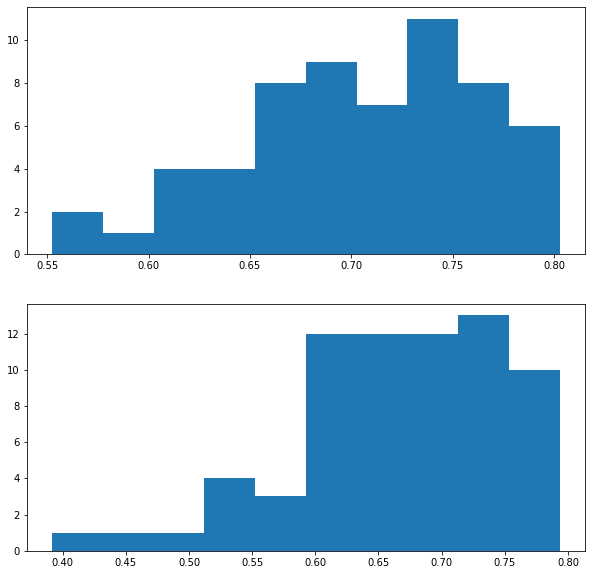

In [ ]:
import random
test_dataset = random.choices(x_test, k=60)
probs_test = model.predict_proba(x_test)
train_dataset = random.choices(x_train, k=60)
probs_train = model.predict_proba(train_dataset)

list_train = []
list_test = []
for prob in probs_train:
  list_train.append(prob.max())
for prob in probs_test:
  list_test.append(prob.max())

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.hist(list_train)
plt.subplot(2,1,2)
plt.hist(list_test)

plt.show()

It is reasonable to choose **threshold = 0.55**

## Predict New Image - **Evaluation**

### Detect, Crop & Align Data

In [ ]:
from tensorflow import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from imutils import paths
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers import Input, BatchNormalization
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import random
import os
import matplotlib.pyplot as plt

**Define your path to the model and fill in the quotation mark below.**

In [ ]:
import joblib
model = joblib.load('/content/drive/MyDrive/Coursework2/model.joblib') # Path to the model

**Define your path to your dataset and fill in the quotation mark below.**

In [ ]:
test_image = list(paths.list_images('test_data/')) # Path to the dataset

random.shuffle(test_image)

test_image

['test_data/Đức_2.png',
 'test_data/Son_Tung.jpg',
 'test_data/NhaPhuong.png',
 'test_data/Hùng_1.png',
 'test_data/Chiellini.jpg',
 'test_data/Messi.jpg',
 'test_data/Jennifer.jpg',
 'test_data/Kevin_Durant.jpg',
 'test_data/Liam.jpg',
 'test_data/Ronaldo.jpg',
 'test_data/Linh_1.png',
 'test_data/Hùng_2.png',
 'test_data/Đức_1.png',
 'test_data/Linh_2.png',
 'test_data/Leonardo.jpg']

In [ ]:
identity = [p.split(os.path.sep)[-1] for p in test_image]
identity

['Đức_2.png',
 'Son_Tung.jpg',
 'NhaPhuong.png',
 'Hùng_1.png',
 'Chiellini.jpg',
 'Messi.jpg',
 'Jennifer.jpg',
 'Kevin_Durant.jpg',
 'Liam.jpg',
 'Ronaldo.jpg',
 'Linh_1.png',
 'Hùng_2.png',
 'Đức_1.png',
 'Linh_2.png',
 'Leonardo.jpg']

Download the required file to use for **dlib-library**: http://arunponnusamy.com/files/mmod_human_face_detector.dat

Then *define the path to this file in the quotation mark below*.

In [ ]:
import argparse
import imutils
import time
import dlib
import cv2

def convert_and_trim_bb(image, rect):
  # extract the starting and ending (x, y)-coordinates of the
  # bounding box
  startX = rect.left()
  startY = rect.top()
  endX = rect.right()
  endY = rect.bottom()

  # ensure the bounding box coordinates fall within the spatial
  # dimensions of the image
  startX = max(0, startX)
  startY = max(0, startY)
  endX = min(endX, image.shape[1])
  endY = min(endY, image.shape[0])

  # compute the width and height of the bounding box
  w = endX - startX
  h = endY - startY
  
  # return our bounding box coordinates
  return (startX, startY, w, h)

# load dlib's CNN face detector
detector = dlib.cnn_face_detection_model_v1('./Save_model/mmod_human_face_detector.dat') # ! DEFINE THE PATH HERE !

new_image_list = []
resized_image_list = []

for image in test_image:
  # load the input image from disk, resize it, and convert it from
  image = cv2.imread(image)
  resized_image = cv2.resize(image, (int(image.shape[1]/2),int(image.shape[0]/2)), interpolation = cv2.INTER_AREA)
  resized_image_list.append(resized_image)

In [ ]:
for image in resized_image_list:
  # BGR to RGB channel ordering (which is what dlib expects)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # perform face detection using dlib's face detector
  results = detector(rgb, 1)

  boxes = [convert_and_trim_bb(image, r.rect) for r in results]

  # loop over the bounding boxes
  for (x, y, w, h) in boxes:
    crop_image = image[y:y+h, x:x+w]
  
  new_image_list.append(crop_image)

In [ ]:
image_list = []
for image in new_image_list:
    resized_image = cv2.resize(image, (160,160), interpolation = cv2.INTER_AREA)
    resized_image = img_to_array(resized_image)
    
    resized_image = np.expand_dims(resized_image, 0) # convert to <numpy.ndarray>
    
    image_list.append(resized_image)
    
image_list = np.vstack(image_list) # convert to <numpy.ndarray> 
image_list.shape

(15, 160, 160, 3)

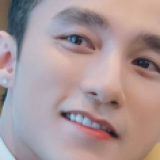

In [ ]:
cv2_imshow(image_list[1])

### Transfer Learning

In [ ]:
norm_image_list = []
for image in image_list:
  image = image.astype('float32')
  mean, std = image.mean(), image.std()
  image = (image - mean) / std

  norm_image_list.append(image)

norm_image_list = np.asarray(norm_image_list)
norm_image_list.shape

(15, 160, 160, 3)

Download the pre-trained **FaceNet** model at: https://drive.google.com/drive/folders/12aMYASGCKvDdkygSv1yQq8ns03AStDO_?usp=sharing

In [ ]:
from keras.models import load_model
facenet = load_model('./Save_model/facenet_keras.h5')

features = facenet.predict(norm_image_list)
features.shape

Cause: could not parse the source code of <function <lambda> at 0x7fb90638dc20>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb90638dc20>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb90638d4d0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb90638d4d0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fb90638d440>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could no

(15, 128)

### Prediction

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
features = normalizer.transform(features)

In [ ]:
dict = {
    0: 'Hiếu',
    1: 'Hùng',
    2: 'HĐức',
    3: 'Kiên',
    4: 'Linh',
    5: 'Quân',
    6: 'Tân',
    7: 'Thắng',
    8: 'Trường',
    9: 'Tuấn',
    10: 'Vân',
    11: 'Việt Đức',
    12: 'Xuân Anh',
    13: 'Đức'}

In [ ]:
probs = model.predict_proba(features)

Đức
Đức_2.png


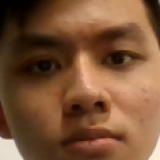



Unknown
Son_Tung.jpg


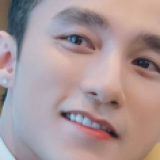



Unknown
NhaPhuong.png


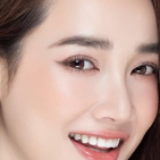



Hùng
Hùng_1.png


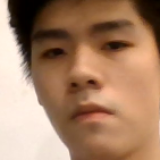



Unknown
Chiellini.jpg


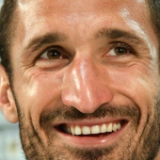



Unknown
Messi.jpg


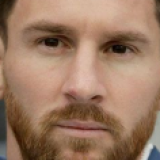



Unknown
Jennifer.jpg


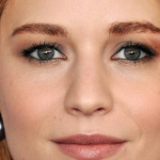



Unknown
Kevin_Durant.jpg


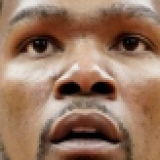



Unknown
Liam.jpg


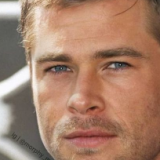



Unknown
Ronaldo.jpg


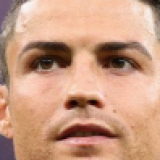



Linh
Linh_1.png


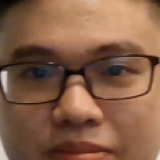



Hùng
Hùng_2.png


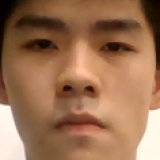



Đức
Đức_1.png


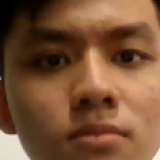



Linh
Linh_2.png


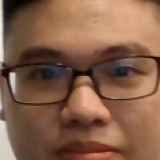



Unknown
Leonardo.jpg


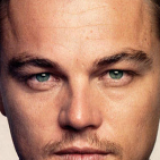

In [ ]:
threshold = 0.55
count = 0
for prob in probs:
  if prob.max() < threshold:
    print('Unknown')
  else:
    print(dict[np.argmax(prob)])
  print(identity[count])
  cv2_imshow(image_list[count])
  print('\n')
  count += 1